DIFFUSION INTERVENTIONS on Attention Maps ᕙ(‾̀◡‾́)ᕗ

In [2]:
from main import load, run
from interventions.ablate import AblationIntervention
from interventions.encoder import EncoderIntervention
from util import encode_prompt
import matplotlib.pyplot as plt
import torch
import numpy as np

In [3]:
model = load()
model._model.pipeline.safety_checker = None

Keyword arguments {'trust_remote_code': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

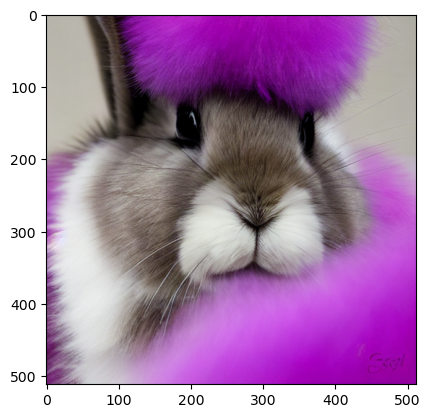

In [6]:
image = run(model, prompt="purple fluffy cute rabbit", seed=40)
plt.imshow(image)

In [7]:
#LAYER PATHS IN THE RIGHT ORDER

my_self_layers =[
    '.unet.down_blocks.0.attentions.0.transformer_blocks.0.attn1', #1
    '.unet.down_blocks.0.attentions.1.transformer_blocks.0.attn1', #2
    '.unet.down_blocks.1.attent', #4
    '.unet.down_blocks.2.attentionsions.0.transformer_blocks.0.attn1', #3
    '.unet.down_blocks.1.attentions.1.transformer_blocks.0.attn1.0.transformer_blocks.0.attn1', #5
    '.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn1', #6
    '.unet.mid_block.attentions.0.transformer_blocks.0.attn1', #7
    '.unet.up_blocks.1.attentions.0.transformer_blocks.0.attn1', #8
    '.unet.up_blocks.1.attentions.1.transformer_blocks.0.attn1', #9
    '.unet.up_blocks.1.attentions.2.transformer_blocks.0.attn1', #10
    '.unet.up_blocks.2.attentions.0.transformer_blocks.0.attn1', #11
    '.unet.up_blocks.2.attentions.1.transformer_blocks.0.attn1', #12
    '.unet.up_blocks.2.attentions.2.transformer_blocks.0.attn1', #13
    '.unet.up_blocks.3.attentions.0.transformer_blocks.0.attn1', #14
    '.unet.up_blocks.3.attentions.1.transformer_blocks.0.attn1', #15
    '.unet.up_blocks.3.attentions.2.transformer_blocks.0.attn1' #16
]

my_cross_layers =[
    '.unet.down_blocks.0.attentions.0.transformer_blocks.0.attn2',
    '.unet.down_blocks.0.attentions.1.transformer_blocks.0.attn2',
    '.unet.down_blocks.1.attentions.0.transformer_blocks.0.attn2',
    '.unet.down_blocks.1.attentions.1.transformer_blocks.0.attn2',
    '.unet.down_blocks.2.attentions.0.transformer_blocks.0.attn2',
    '.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn2',
    '.unet.mid_block.attentions.0.transformer_blocks.0.attn2',
    '.unet.up_blocks.1.attentions.0.transformer_blocks.0.attn2',
    '.unet.up_blocks.1.attentions.1.transformer_blocks.0.attn2',
    '.unet.up_blocks.1.attentions.2.transformer_blocks.0.attn2',
    '.unet.up_blocks.2.attentions.0.transformer_blocks.0.attn2',
    '.unet.up_blocks.2.attentions.1.transformer_blocks.0.attn2',
    '.unet.up_blocks.2.attentions.2.transformer_blocks.0.attn2',
    '.unet.up_blocks.3.attentions.0.transformer_blocks.0.attn2',
    '.unet.up_blocks.3.attentions.1.transformer_blocks.0.attn2',
    '.unet.up_blocks.3.attentions.2.transformer_blocks.0.attn2'
]

In [6]:
#BLOCKS:
down_1 = [0,1]
down_2 = [2,3]
down_3 = [4,5]
mid = [6]
up_1 = [7,8,9]
up_2 = [10,11,12]
up_3 = [13,14,15]

PLOT IMAGE

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:05<00:00,  8.79it/s]


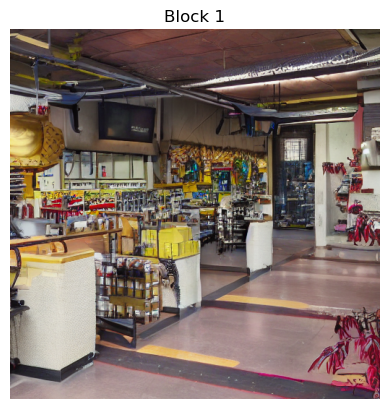

In [8]:
envoys = model._envoy.modules(lambda envoy : envoy._module_path.endswith('attn2'))# and envoy._module_path not in [my_cross_layers[idx] for idx in [np.concatenate[down_3, mid]]])

#intervention1 = AblationIntervention(envoys)

blank_embeds = encode_prompt("", model)
intervention2 = EncoderIntervention(blank_embeds, envoys)
    
image = run(model, prompt="blue elephant", seed=40, interventions=[intervention2])

plt.title("Block 1")
plt.axis('off')
plt.imshow(image)

<span style="color: #FF4FA7; font-family: Times New Roman; font-size: 2em;">Accessing Attention Maps</span>

In [13]:
#generator.manual_seed(40)
with model.generate('cute dog', num_inference_steps=50, validate=False, scan=False): #
        
    modules = model._envoy.modules(lambda envoy : envoy._module_path.endswith('attn1') or envoy._module_path.endswith('attn2')) #for all self and cross attn right now

    for module in modules:
        i = 0
    #with model.generate("blue cat", scan=False, validate=False):
        for i in range(50):
            if i != 0:
                module.next()
            
            attn = model.unet.mid_block.attentions[0].transformer_blocks[0].attn1
            #or: .unet.up_blocks.2.attentions.1.transformer_blocks.0.attn1
            q = attn.to_q.output.save()
            k = attn.to_k.output.save()

            attn_map = attn.input[1]["attention_mask"].save()
            encoder = attn.input[1]["encoder_hidden_states"].save()

        q = attn.head_to_batch_dim(q.value)
        k = attn.head_to_batch_dim(k.value)

        probs = attn.get_attention_scores(q, k)
        print(probs.shape)
        
        #probs_np = probs.cpu().numpy()



# for i in range(50): #timesteps  
#     if i != 0:
#         module.next() #this is how you tell the module that we are working with the next iteration
        
#     module.output[:] = 0 #ablates output
# shapes.append((module._module_path, module.output.shape.save()))



# plt.figure(figsize=(20, 20))
# for i in range(16):
#     plt.subplot(4, 4, i+1)
#     plt.imshow(probs_np[i], cmap='cool')#, interpolation='nearest')
#    # plt.colorbar()
# plt.title
# plt.show()

ValueError: Accessing Proxy value before it's been set.

ATTENTION MAPS

In [42]:
# from nnsight.models.DiffusionModel import DiffusionModel

# model = DiffusionModel("CompVis/stable-diffusion-v1-4", dispatch=True).to('cuda:0')
# generator = torch.Generator()

with model.generate("blue cat", scan=False, validate=False) as tracer:
    #attn = model.unet.mid_block.attentions[0].transformer_blocks[0].attn1
    attn = model.unet.up_blocks[3].attentions[2].transformer_blocks[0].attn1
    #.unet.up_blocks.2.attentions.1.transformer_blocks.0.attn1
    
    q_list = []
    k_list = []
    maps_last = []

    for i in range(50):
        if i != 0:
            attn.next(propagate=True)
        q = attn.to_q.output.cpu()
        k = attn.to_k.output.cpu()

        q = tracer.apply(attn.head_to_batch_dim, False, q)
        k = tracer.apply(attn.head_to_batch_dim, False, k)
        probs = tracer.apply(attn.get_attention_scores, False, q, k).save()
        maps.append(probs)

        # q_list.append(q)
        # k_list.append(k)
        # attn_map = attn.input[1]["attention_mask"].save()
        # encoder = attn.input[1]["encoder_hidden_states"].save()

# print(q_list[0].shape)
print(maps_last[0])
maps = torch.stack(maps_last)
print(maps_last.shape)
# print(q_list.shape)
# print(attn_map)
# q = attn.head_to_batch_dim(q.value)
# k = attn.head_to_batch_dim(k.value)

#probs = attn.get_attention_scores(q, k)
#print(probs.shape)
#probs_np = probs.cpu().numpy()

# plt.figure(figsize=(20, 20))
# for i in range(16):
#     plt.subplot(4, 4, i+1)
#     plt.imshow(probs_np[i], cmap='cool')#, interpolation='nearest')
#    # plt.colorbar()
# plt.title
# plt.show()

AttributeError: 'Tensor' object has no attribute 'append'

In [43]:
plt.figure(figsize=(100, 100), dpi=100)
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(maps.cpu()[49][i], cmap='cool')#, interpolation='nearest')
    plt.colorbar()
plt.title
plt.show()

In [47]:
plt.figure(figsize=(100, 100), dpi=100)

plt.imshow(maps.cpu()[49][5], cmap='cool')#, interpolation='nearest')
plt.colorbar()
plt.title
plt.show()

In [21]:
#torch.Size([50, 16, 64, 64])
gif_list = []
for t in range(50):
    plt.figure(figsize=(20, 20))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(maps.cpu()[t][i], cmap='cool')#, interpolation='nearest')
    plt.savefig(f"time-maps/up-1-timestep{t}.png")
    plt.clf()
   # plt.colorbar()
# plt.title
# plt.show()

/tmp/ipykernel_311913/1066643202.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20, 20))


<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [27]:
print(maps.max(dim=1).values.max(dim=1).values.max(dim=1).values)

tensor([0.3321, 0.3419, 0.3418, 0.3478, 0.3500, 0.3440, 0.3893, 0.4219, 0.3947,
        0.3839, 0.3406, 0.3060, 0.3257, 0.3368, 0.3994, 0.3693, 0.4218, 0.4125,
        0.4196, 0.4072, 0.3894, 0.3695, 0.3507, 0.3545, 0.3413, 0.3409, 0.3522,
        0.3643, 0.3740, 0.3818, 0.3886, 0.3894, 0.3888, 0.3849, 0.3805, 0.3814,
        0.3839, 0.3886, 0.3932, 0.3974, 0.4017, 0.4057, 0.4089, 0.4120, 0.4139,
        0.4154, 0.4174, 0.4198, 0.4264, 0.4430], device='cuda:0')
